In [94]:
# Importing libraries
import datetime
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import requests
import scipy.stats as st
from scipy.stats import linregress
import time
from citipy import citipy

In [95]:
# Importing api key
from api_keys import weather_api_key
api_key = weather_api_key

In [96]:
# Creating empty list to be filled with cities
emptycities = []

# Random lats and longs for list
latlist= np.random.uniform(-90,90,1600)
longlist= np.random.uniform(-180,180,1600)
coordlist = [(latlist[i], longlist[i]) for i in range(0, len(latlist))]

# Finding the nearest cities to the lat and longitude
for coord in coordlist:
    city = citipy.nearest_city(coord[0], coord[1]).city_name
    
    # Keeping every city unique
    if city not in emptycities:
        emptycities.append(city)

# Printing the number of random cities to make sure that we have over 500 cities to visualize
print(len(emptycities))

682


In [97]:
# Creating list to filled with the cities' data
citiesinfo = []

# Creates base of url
base = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + api_key

# Begins both the record count and the set count at 1
rcount = 1
scount = 1

# Iterates through each city in the city list at a set limit and time delay
for i, city in enumerate(emptycities):
    time.sleep(0.25)
    # After 50 cities, resets the record count to 0 and restarts the process.
    if (i % 50 == 0 and i >= 50):
        scount += 1
        rcount = 0
        
    # Prints City's Name along with its Record and Set Count
    print(f"Processing Record {rcount} of set {scount} | {city}")
    
    # Adds 1 to Record Count
    rcount += 1
    url = f"{base}&q={city}"
    
    # Performs requests for API data to retrieve all variables needed
    try:
        wdata = requests.get(url).json()
        temperature = wdata['main']['temp']
        max_tmp = wdata['main']['temp_max']
        humidity = wdata['main']['humidity']
        longitude = wdata['coord']['lon']
        latitude = wdata['coord']['lat']
        clouds = wdata['clouds']['all']
        country = wdata['sys']['country']
        windspeed = wdata['wind']['speed']
        date = wdata['dt']
        
        # Add data requested into cities_data and convert to dictionary
        citiesinfo.append({"City" : city,
                           "Temperature" : temperature,
                           "Humidity" : humidity,
                           "Longitude" : longitude,
                           "Latitude" : latitude,
                           "Cloudiness" : clouds,
                           "Country" :  country,
                           "Windspeed": windspeed,
                           "Date": date
                           })
    # Adds exceptions when city is not found to keep the code running
    except:
        # Adds print statement for when exception is found
        print(f'City not found. Skipping...')
        pass

# Prints when its done running
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Processing Record 1 of set 1 | amderma
City not found. Skipping...
Processing Record 2 of set 1 | cabo san lucas
Processing Record 3 of set 1 | cockburn town
Processing Record 4 of set 1 | rikitea
Processing Record 5 of set 1 | salalah
Processing Record 6 of set 1 | lac-megantic
Processing Record 7 of set 1 | nizhneyansk
City not found. Skipping...
Processing Record 8 of set 1 | vaini
Processing Record 9 of set 1 | mataura
Processing Record 10 of set 1 | grand river south east
City not found. Skipping...
Processing Record 11 of set 1 | mastic beach
Processing Record 12 of set 1 | acapulco
Processing Record 13 of set 1 | qaanaaq
Processing Record 14 of set 1 | avarua
Processing Record 15 of set 1 | apucarana
City not found. Skipping...
Processing Record 16 of set 1 | atuona
Processing Record 17 of set 1 | bubaque
Processing Record 18 of set 1 | esperance
Processing Record 19 of set 1 | kruisfontein
Processing Record 20 of set 1 | tasiilaq
Processing Record 21 of set 1 | solotvyn
Process

In [118]:
# Creating Dataframe
weather_df = pd.DataFrame.from_dict(citiesinfo)

# Saving data to csv file
weather_csv = weather_df.to_csv("C:\\Users\\davej\\OneDrive\\Desktop\\Bootcamp\\python-api-challenge\\Output\\citiesdat.csv", encoding="utf-8", index=True)

# Printing dataframe 
weather_df

,City,Temperature,Humidity,Longitude,Latitude,Cloudiness,Country,Windspeed,Date
0,cabo san lucas,82.53,44,-109.9124,22.8909,0,MX,12.66,1651882542
1,cockburn town,76.96,78,-71.1419,21.4612,40,TC,11.50,1651882543
2,rikitea,77.52,85,-134.9692,-23.1203,89,PF,14.85,1651882543
3,salalah,82.49,83,54.0924,17.0151,20,OM,1.14,1651882544
4,lac-megantic,37.35,66,-70.8823,45.5834,11,CA,2.89,1651882545
...,...,...,...,...,...,...,...,...,...
629,sisimiut,26.76,68,-53.6735,66.9395,11,GL,5.97,1651882749
630,sibiti,70.59,96,13.3499,-3.6819,100,CG,2.73,1651883001
631,passo fundo,53.15,81,-52.4067,-28.2628,100,BR,5.08,1651882783
632,waverley,54.23,69,28.2591,-25.7023,0,ZA,2.30,1651883002


In [119]:
# Keeping only cities with humidity under 100
weather_df = weather_df[weather_df["Humidity"] <= 100]

# Showing new dataframe
weather_df

,City,Temperature,Humidity,Longitude,Latitude,Cloudiness,Country,Windspeed,Date
0,cabo san lucas,82.53,44,-109.9124,22.8909,0,MX,12.66,1651882542
1,cockburn town,76.96,78,-71.1419,21.4612,40,TC,11.50,1651882543
2,rikitea,77.52,85,-134.9692,-23.1203,89,PF,14.85,1651882543
3,salalah,82.49,83,54.0924,17.0151,20,OM,1.14,1651882544
4,lac-megantic,37.35,66,-70.8823,45.5834,11,CA,2.89,1651882545
...,...,...,...,...,...,...,...,...,...
629,sisimiut,26.76,68,-53.6735,66.9395,11,GL,5.97,1651882749
630,sibiti,70.59,96,13.3499,-3.6819,100,CG,2.73,1651883001
631,passo fundo,53.15,81,-52.4067,-28.2628,100,BR,5.08,1651882783
632,waverley,54.23,69,28.2591,-25.7023,0,ZA,2.30,1651883002


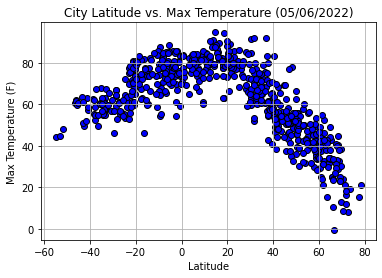

In [120]:
# Setting variables
city_latitude = weather_df["Latitude"]
city_temperature = weather_df["Temperature"]
date = datetime.date.today()
date = time.strftime("(%m/%d/%Y)")

# Creating parameters for the plot
plt.scatter(city_latitude, city_temperature, marker="o", facecolor="blue", edgecolor="black")
plt.title(f"City Latitude vs. Max Temperature {date}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Saving data as png
plt.savefig("C:\\Users\\davej\\OneDrive\\Desktop\\Bootcamp\\python-api-challenge\\Output\\Latitude_vs_Temperature.png")

# Showing png
plt.show()

# The highest temperature is found at around 20 latitude and as the latitude increases/decreases then the temperature drops

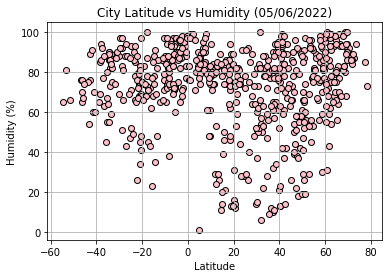

In [121]:
# Setting variables
city_humidity = weather_df["Humidity"]

# Creating parameters for the plot
plt.scatter(city_latitude, city_humidity, marker="o", facecolor="pink", edgecolor="black")
plt.title(f"City Latitude vs Humidity {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Saving data as png
plt.savefig("C:\\Users\\davej\\OneDrive\\Desktop\\Bootcamp\\python-api-challenge\\Output\\Latitude_vs_Humidity.png")

# Showing png
plt.show()

# This graph looks to show that humidity drops after the latitude increases past 0

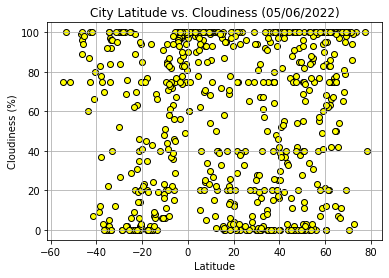

In [122]:
# Setting variables
city_cloudiness = weather_df["Cloudiness"]

# Creating parameters for the plot
plt.scatter(city_latitude, city_cloudiness, marker="o", facecolor="yellow", edgecolor="black")
plt.title(f"City Latitude vs. Cloudiness {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Saving data as png
plt.savefig("C:\\Users\\davej\\OneDrive\\Desktop\\Bootcamp\\python-api-challenge\\Output\\Latitude_vs_Cloudiness.png")

# Showing png
plt.show()

# Cloudiness looks to be evenly spread throughout all latitudes both negative and positive

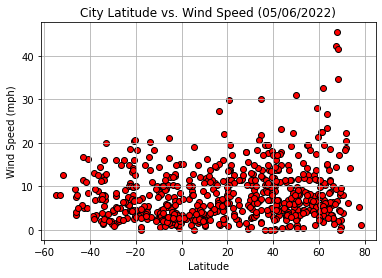

In [123]:
# Setting variables
city_wind_speed = weather_df["Windspeed"]

# Creating parameters for the plot
plt.scatter(city_latitude, city_wind_speed, marker="o", facecolor="red", edgecolor="black")
plt.title(f"City Latitude vs. Wind Speed {date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Saving data as png
plt.savefig("C:\\Users\\davej\\OneDrive\\Desktop\\Bootcamp\\python-api-challenge\\Output\\Latitude_vs_Wind_Speed.png")

# Showing png
plt.show()

# This graph shows that wind speed is pretty evenly spread throughout both negative and positive latitudes.  It may have slightly higher winds on rare occasions in positive latitudes.

In [124]:
# Seperating cities into Northern and Southern Hemispheres
northcities = weather_df.loc[weather_df["Latitude"]>=0]
southcities = weather_df.loc[weather_df["Latitude"]<=0]

The r-value is: -0.88


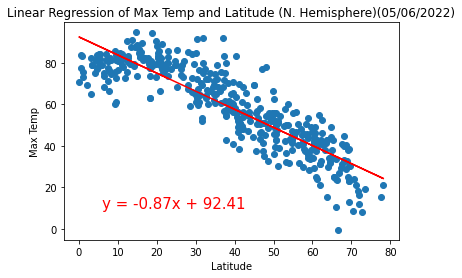

In [125]:
# Setting variables
norlatitude = northcities["Latitude"]
nortemperature = northcities["Temperature"]

# Setting Linear Regression Line
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(norlatitude, nortemperature)
regression = norlatitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plotting / Regression Line 
plt.scatter(norlatitude, nortemperature)
plt.plot(norlatitude, regression, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title(f"Linear Regression of Max Temp and Latitude (N. Hemisphere){date}")

# Saving data as png
plt.savefig("C:\\Users\\davej\\OneDrive\\Desktop\\Bootcamp\\python-api-challenge\\Output\\Northern_Hem_Temp_vs_Lat.png")

print(f"The r-value is: {round(st.pearsonr(nortemperature, norlatitude)[0],2)}")

# There is a very strong negative correlation between max temperature and latitude according to this graph of the northern hemisphere and the data that we have analyzed.

The r-value is: 0.7


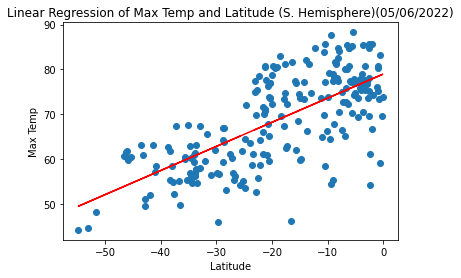

In [126]:
# Setting variables
soulatitude = southcities["Latitude"]
soutemperature = southcities["Temperature"]

# Setting Linear Regression Line
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(soulatitude, soutemperature)
regression = soulatitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plotting / Regression Line
plt.scatter(soulatitude, soutemperature)
plt.plot(soulatitude, regression, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title(f"Linear Regression of Max Temp and Latitude (S. Hemisphere){date}")

# Saving as png
plt.savefig("C:\\Users\\davej\\OneDrive\\Desktop\\Bootcamp\\python-api-challenge\\Output\\Southern_Hem_Temp_vs_Lat.png")

print(f"The r-value is: {round(st.pearsonr(soutemperature, soulatitude)[0],2)}")

# There is a very strong positive correlation between max temperature and latitude according to this graph of the southern hemisphere and the data that we have analyzed.

The r-value is: 0.13


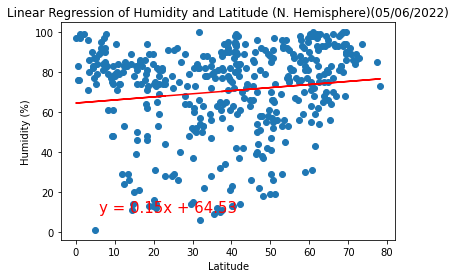

In [127]:
# Setting variables
norhumidity = northcities["Humidity"]

# Setting Linear Regression Line
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(norlatitude, norhumidity)
regress_values = norlatitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plotting / Regression Line
plt.scatter(norlatitude, norhumidity)
plt.plot(norlatitude, regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"Linear Regression of Humidity and Latitude (N. Hemisphere){date}")

# Saving as png
plt.savefig("C:\\Users\\davej\\OneDrive\\Desktop\\Bootcamp\\python-api-challenge\\Output\\Northern_Hem_Humidity_vs_Lat.png")

print(f"The r-value is: {round(st.pearsonr(norhumidity, norlatitude)[0],2)}")

# There is a slight positive and very weak correlation between humidity and latitude according to this graph of the northern hemisphere and the data that we have analyzed.

The r-value is: 0.23


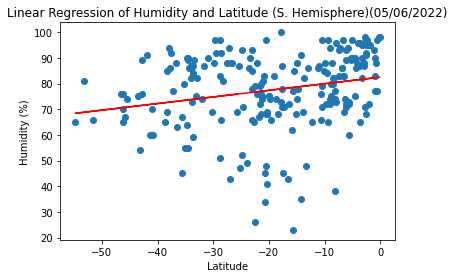

In [128]:
# Setting variables
souhumidity = southcities["Humidity"]

# Setting Linear Regression Line
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(soulatitude, souhumidity)
regress_values = soulatitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plotting / Regression Line
plt.scatter(soulatitude, souhumidity)
plt.plot(soulatitude, regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"Linear Regression of Humidity and Latitude (S. Hemisphere){date}")

# Saving as png
plt.savefig("C:\\Users\\davej\\OneDrive\\Desktop\\Bootcamp\\python-api-challenge\\Output\\Southern_Hem_Humidity_vs_Lat.png")

print(f"The r-value is: {round(st.pearsonr(souhumidity, soulatitude)[0],2)}")

# There is a slight positive and very weak correlation between humidity and latitude according to this graph of the southern hemisphere and the data that we have analyzed.

The r-value is: 0.11


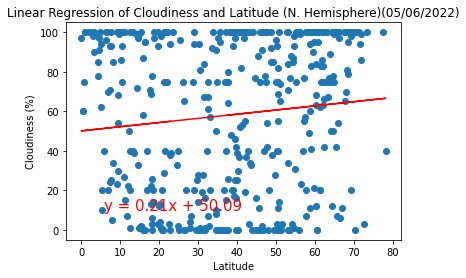

In [129]:
# Setting variables
norcloudiness = northcities["Cloudiness"]

# Setting Linear Regression Line
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(norlatitude, norcloudiness)
regress_values = norlatitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plotting / Regression Line
plt.scatter(norlatitude, norcloudiness)
plt.plot(norlatitude, regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"Linear Regression of Cloudiness and Latitude (N. Hemisphere){date}")

# Saving as png
plt.savefig("C:\\Users\\davej\\OneDrive\\Desktop\\Bootcamp\\python-api-challenge\\Output\\Northern_Hem_Cloudiness_vs_Lat.png")

print(f"The r-value is: {round(st.pearsonr(norcloudiness, norlatitude)[0],2)}")

# There is a slight positive and very weak correlation between cloudiness and latitude according to this graph of the northern hemisphere and the data that we have analyzed.

The r-value is: 0.11


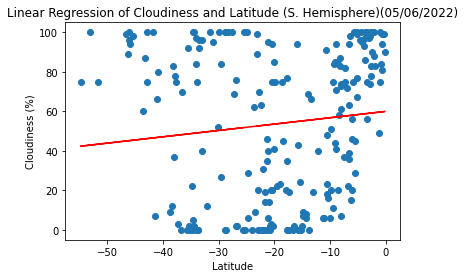

In [130]:
# Setting Variables
soucloudiness = southcities["Cloudiness"]

# Setting Linear Regression Line
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(soulatitude, soucloudiness)
regress_values = soulatitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plotting / Regression Line
plt.scatter(soulatitude, soucloudiness)
plt.plot(soulatitude, regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"Linear Regression of Cloudiness and Latitude (S. Hemisphere){date}")

# Saving as png
plt.savefig("C:\\Users\\davej\\OneDrive\\Desktop\\Bootcamp\\python-api-challenge\\Output\\Southern_Hem_Cloudiness_vs_Lat.png")

print(f"The r-value is: {round(st.pearsonr(soucloudiness, soulatitude)[0],2)}")

# There is a slight positive and very weak correlation between cloudiness and latitude according to this graph of the southern hemisphere and the data that we have analyzed.

The r-value is: 0.16


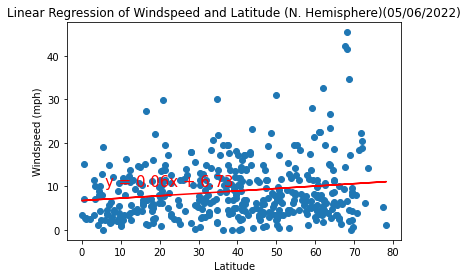

In [131]:
# Setting variables
norwindspeed = northcities["Windspeed"]

# Setting Linear Regression Line
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(norlatitude, norwindspeed)
regress_values = norlatitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plotting / Regression Line
plt.scatter(norlatitude, norwindspeed)
plt.plot(norlatitude, regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
plt.title(f"Linear Regression of Windspeed and Latitude (N. Hemisphere){date}")

# Saving as png
plt.savefig("C:\\Users\\davej\\OneDrive\\Desktop\\Bootcamp\\python-api-challenge\\Output\\Northern_Hem_Windspeed_vs_Lat.png")

print(f"The r-value is: {round(st.pearsonr(norwindspeed, norlatitude)[0],2)}")

# There is a slight positive and very weak correlation between windspeed and latitude according to this graph of the northern hemisphere and the data that we have analyzed.

The r-value is: -0.15


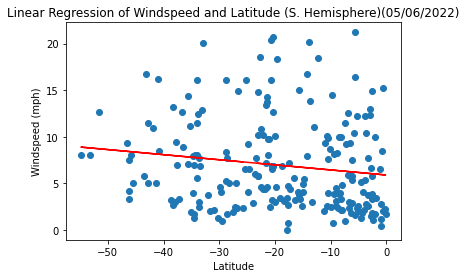

In [132]:
# Setting variables
souwindspeed = southcities["Windspeed"]

# Setting Linear Regression Line
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(soulatitude, souwindspeed)
regress_values = soulatitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plotting / Regression Line
plt.scatter(soulatitude, souwindspeed)
plt.plot(soulatitude, regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
plt.title(f"Linear Regression of Windspeed and Latitude (S. Hemisphere){date}")

# Saving as png
plt.savefig("C:\\Users\\davej\\OneDrive\\Desktop\\Bootcamp\\python-api-challenge\\Output\\Southern_Hem_Windspeed_vs_Lat.png")

print(f"The r-value is: {round(st.pearsonr(souwindspeed, soulatitude)[0],2)}")

# There is a slight negative and very weak correlation between windspeed and latitude according to this graph of the southern hemisphere and the data that we have analyzed.